### Imports

In [1]:
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
from math import exp

### Variable Definition
Inputs from [this site](http://machinelearningmastery.com/logistic-regression-tutorial-for-machine-learning/) to make it comparable

In [2]:
X1 = np.array([
        2.7810836, 
        1.465489372, 
        3.396561688, 
        1.38807019, 
        3.06407232, 
        7.627531214, 
        5.332441248, 
        6.922596716, 
        8.675418651, 
        7.673756466])

X2 = np.array([
        2.550537003,
        2.362125076,
        4.400293529,
        1.850220317,
        3.005305973,
        2.759262235,
        2.088626775,
        1.77106367,
        0.2420686549,
        3.508563011,
    ])

Y = np.array([0,0,0,0,0,1,1,1,1,1])

### Format as Table (Pandas DataFrame)

In [3]:
d = {'X1': X1, 'X2': X2, 'Y' : Y}
df = DataFrame(d)
df

,X1,X2,Y
0,2.781084,2.550537,0
1,1.465489,2.362125,0
2,3.396562,4.400294,0
3,1.388070,1.850220,0
4,3.064072,3.005306,0
5,7.627531,2.759262,1
6,5.332441,2.088627,1
7,6.922597,1.771064,1
8,8.675419,0.242069,1
9,7.673756,3.508563,1


### Plot data
lower X1 values are labeled 0 and higher X1 values are labeled 1

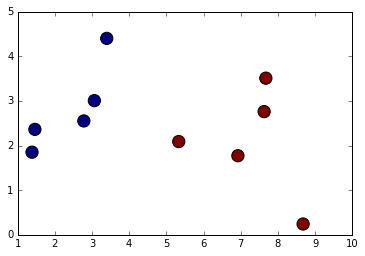

In [4]:
plt.scatter(X1,X2,c=Y,s=150)

### Function definition
- the general logistic function
- calculate the prediction for a row when you know all bs
- update bs with the last prediction with complicated formula

My interpretation of the update:  
`b + alpha * (row['Y'] - prediction) * prediction * (1 - prediction) * x`  
to the old value (b) add a small fraction (alpha) of the error (row['Y'] - prediction) of this try.  
don't understand the rest of it completely: `prediction * (1 - prediction) * x`  

In [5]:
alpha = 0.3 #Steps to take to get closer

def logistic_function(x):
    return 1/(1+exp(-x))

def get_prediction(row,b):
    output = b[0] + row['X1'] * b[1] + row['X2'] * b[2]
    prediction = logistic_function(output)
    #print "Prediction: ",prediction
    return prediction

def update_ceofficients(row,bs):
    prediction = get_prediction(row,bs)
    print "Prediction: ",prediction
    for i,b in enumerate(bs):
        if i == 0:
            x = 1
        else:
            x = row[i-1]
        bs[i] = b + alpha * (row['Y'] - prediction) * prediction * (1 - prediction) * x
        print ("New B%i: %f" %(i,bs[i]))
    return bs
        

### Manual first tries of the algorithm
start with the first row and 0s for all bs

In [6]:
bs = [0,0,0]

row = df.iloc[0,:]
prediction = get_prediction(row,bs)
print "Prediction: ",prediction

Prediction:  0.5


In [7]:
bs = update_ceofficients(row,bs)

Prediction:  0.5
New B0: -0.037500
New B1: -0.104291
New B2: -0.095645


#### second row:

In [8]:
row = df.iloc[1,:]
bs = update_ceofficients(row,bs)

Prediction:  0.397411423273
New B0: -0.066051
New B1: -0.146132
New B2: -0.163086


### Actual algorithm
iterate through the whole dataset epochs times

In [9]:
bs = [0,0,0]
epochs = 10

for epoch in range(epochs):
    for row in range(len(df)):
        row = df.iloc[row,:]
        bs = update_ceofficients(row,bs)

Prediction:  0.5
New B0: -0.037500
New B1: -0.104291
New B2: -0.095645
Prediction:  0.397411423273
New B0: -0.066051
New B1: -0.146132
New B2: -0.163086
Prediction:  0.217545899385
New B0: -0.077160
New B1: -0.183865
New B2: -0.211970
Prediction:  0.326387638068
New B0: -0.098688
New B1: -0.213747
New B2: -0.251801
Prediction:  0.180884886062
New B0: -0.106728
New B1: -0.238383
New B2: -0.275965
Prediction:  0.0637770219106
New B0: -0.089958
New B1: -0.110466
New B2: -0.229691
Prediction:  0.238894578754
New B0: -0.048442
New B1: 0.110916
New B2: -0.142979
Prediction:  0.614475295653
New B0: -0.021043
New B1: 0.300587
New B2: -0.094454
Prediction:  0.928495673675
New B0: -0.019619
New B1: 0.312942
New B2: -0.094109
Prediction:  0.886112622069
New B0: -0.016171
New B1: 0.339401
New B2: -0.082012
Prediction:  0.672289132447
New B0: -0.060606
New B1: 0.215824
New B2: -0.195345
Prediction:  0.44874385574
New B0: -0.093908
New B1: 0.167020
New B2: -0.274009
Prediction:  0.324682988997
New B

### Result Bs:

In [10]:
for i,b in enumerate(bs):
    print ("Last B%i: %f" %(i,b))

Last B0: -0.406677
Last B1: 0.852635
Last B2: -1.104851


### Get Prediction with latest Bs and translate to label

In [11]:
labels = []
for rowNumber in range(len(df)):
        row = df.iloc[rowNumber,:]
        prediction = get_prediction(row,bs)
        if prediction > 0.5:
            labels.append(1)
        else:
            labels.append(0)
        print ("Prediction for row %i: %f | predicted label: %i | original label: %i" %(rowNumber,prediction,labels[rowNumber],row['Y']))

Prediction for row 0: 0.298722 | predicted label: 0 | original label: 0
Prediction for row 1: 0.145923 | predicted label: 0 | original label: 0
Prediction for row 2: 0.085308 | predicted label: 0 | original label: 0
Prediction for row 3: 0.219706 | predicted label: 0 | original label: 0
Prediction for row 4: 0.247022 | predicted label: 0 | original label: 0
Prediction for row 5: 0.954707 | predicted label: 1 | original label: 1
Prediction for row 6: 0.862039 | predicted label: 1 | original label: 1
Prediction for row 7: 0.971778 | predicted label: 1 | original label: 1
Prediction for row 8: 0.998798 | predicted label: 1 | original label: 1
Prediction for row 9: 0.905492 | predicted label: 1 | original label: 1
